# Unsupervised Learning Project: Customer Segmentation Analysis

## GitHub
GitHub URL: https://github.com/xllcheryl/Unsupervised-Algorithms-in-Machine-Learning-Final-Project

## 1. Problem Description and Data Collection

### 1.1 Project Overview
This project focuses on customer segmentation using unsupervised learning techniques. The goal is to identify distinct groups of customers based on their purchasing behavior and demographic characteristics. This segmentation can help businesses develop targeted marketing strategies and personalized customer experiences.

### 1.2 Dataset Description
The dataset used is the "Mall Customer Segmentation Data" from Kaggle, which contains basic information about mall customers. This is a publicly available dataset commonly used for clustering exercises.

**Data Provenance:**
- Source: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
- Collection Method: The data was likely collected through mall membership cards and customer surveys
- Contains: 200 records with 5 customer attributes

### 1.3 Business Problem
The primary objective is to identify distinct customer segments that exhibit similar behaviors and characteristics. By understanding these segments, businesses can:
- Develop targeted marketing campaigns
- Optimize product offerings for different customer groups
- Improve customer retention through personalized experiences
- Allocate resources more effectively based on customer value

### 1.4 Analytical Approach

#### 1.4.1. Exploratory Data Analysis (EDA)
- Distribution analysis of all features
- Correlation analysis between variables
- Identification of patterns and relationships in the data
- Outlier detection and treatment

#### 1.4.2. Feature Engineering
- Encoding categorical variables
- Feature scaling and normalization
- Dimensionality reduction using PCA

#### 1.4.3. Model Development
Multiple clustering algorithms will be implemented and compared:

- **K-Means Clustering**: Partitioning method that separates data into k clusters
- **Gaussian Mixture Models (GMM)**: Probabilistic approach that assumes data points are generated from a mixture of Gaussian distributions
- **Hierarchical Clustering**: Builds a hierarchy of clusters either agglomeratively or divisively
- **DBSCAN**: density-based, noise-aware

#### 1.4.4. Evaluation Metrics
Multiple internal validation metrics will be used:
- **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters
- **Calinski-Harabasz Index**: Ratio of between-clusters dispersion to within-cluster dispersion
- **Davies-Bouldin Index**: Average similarity measure of each cluster with its most similar cluster

### Expected Outcomes
1. Identification of distinct customer segments with unique characteristics
2. Comparison of different clustering algorithms
3. Actionable insights for targeted marketing strategies
4. Understanding of customer behavior patterns

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
%matplotlib inline

## 2. Data Loading and Initial Inspection

In [2]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Check for duplicate entries
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [6]:
# Statistical summary
df.describe().round(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [7]:
# Check unique values for categorical columns
print("Unique values in Gender:", df['Gender'].unique())

Unique values in Gender: ['Male' 'Female']


## 3. Exploratory Data Analysis (EDA)

### 3.1 Univariate Analysis

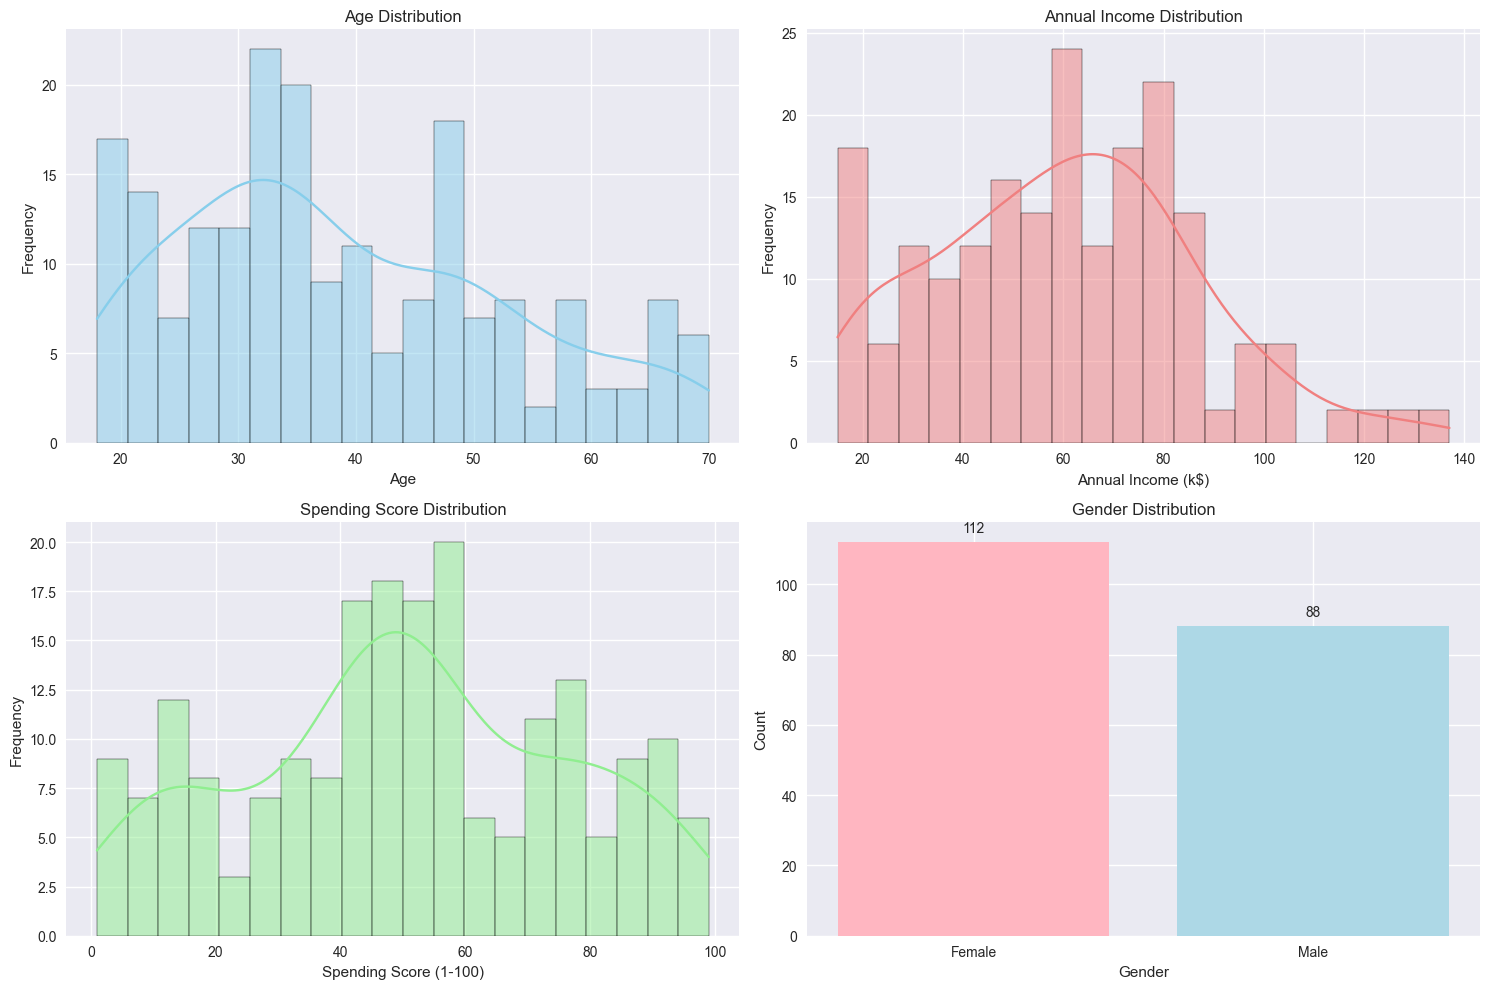

In [8]:
# Distribution of numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Annual Income distribution
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Annual Income Distribution')
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Frequency')

# Spending Score distribution
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Spending Score Distribution')
axes[1, 0].set_xlabel('Spending Score (1-100)')
axes[1, 0].set_ylabel('Frequency')

# Gender distribution
gender_counts = df['Gender'].value_counts()
axes[1, 1].bar(gender_counts.index, gender_counts.values, color=['lightpink', 'lightblue'])
axes[1, 1].set_title('Gender Distribution')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')
for i, v in enumerate(gender_counts.values):
    axes[1, 1].text(i, v + 2, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

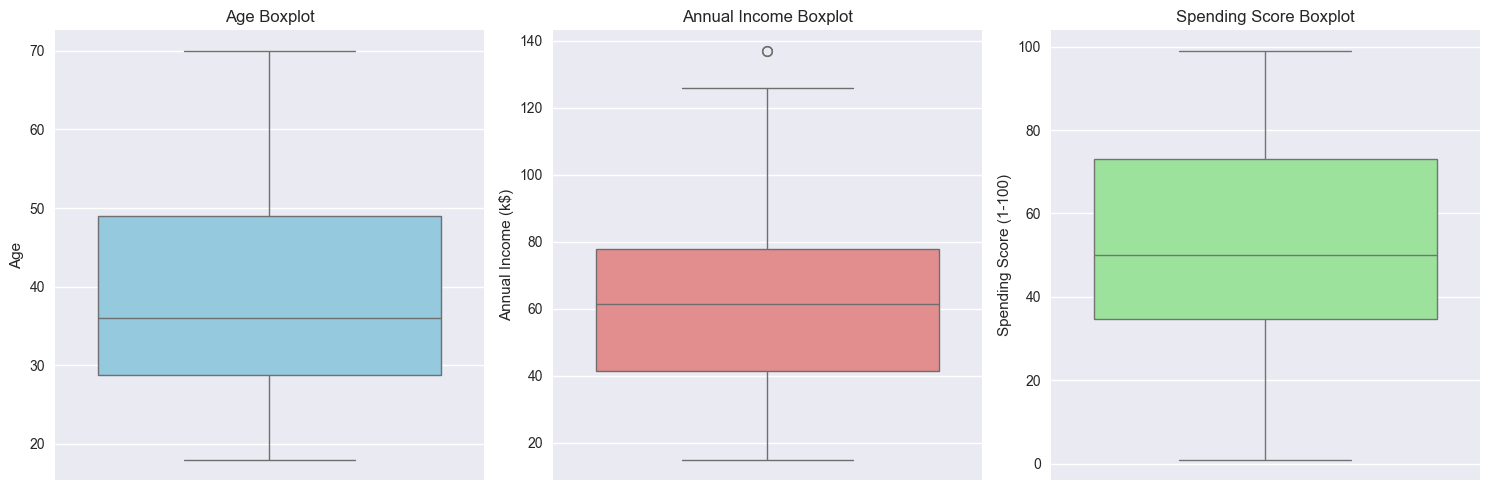

In [9]:
# Boxplots for numerical features to identify outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=df['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Age Boxplot')

sns.boxplot(y=df['Annual Income (k$)'], ax=axes[1], color='lightcoral')
axes[1].set_title('Annual Income Boxplot')

sns.boxplot(y=df['Spending Score (1-100)'], ax=axes[2], color='lightgreen')
axes[2].set_title('Spending Score Boxplot')

plt.tight_layout()
plt.show()

### 3.2 Bivariate Analysis

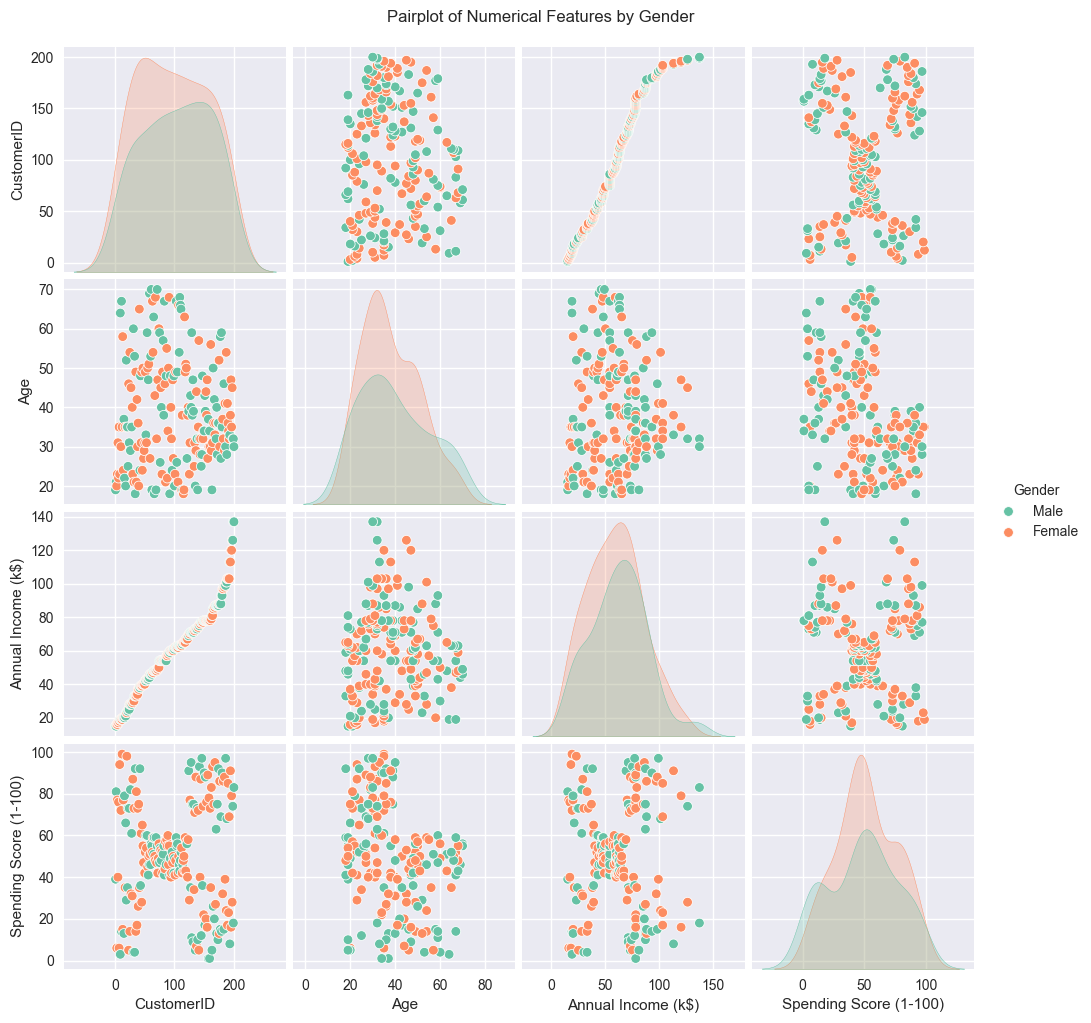

In [10]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df, hue='Gender', diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot of Numerical Features by Gender', y=1.02)
plt.show()

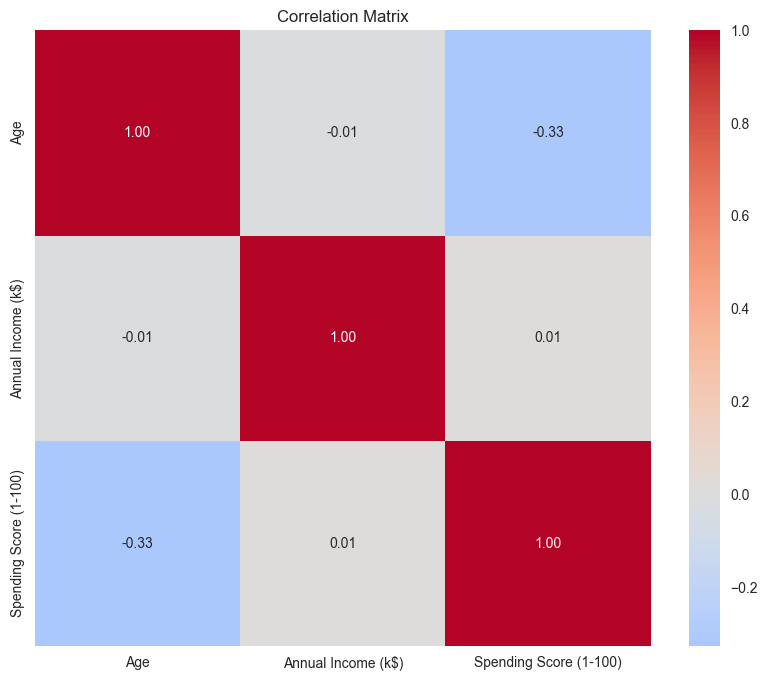

In [11]:
# Correlation matrix
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number]).drop('CustomerID', axis=1)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

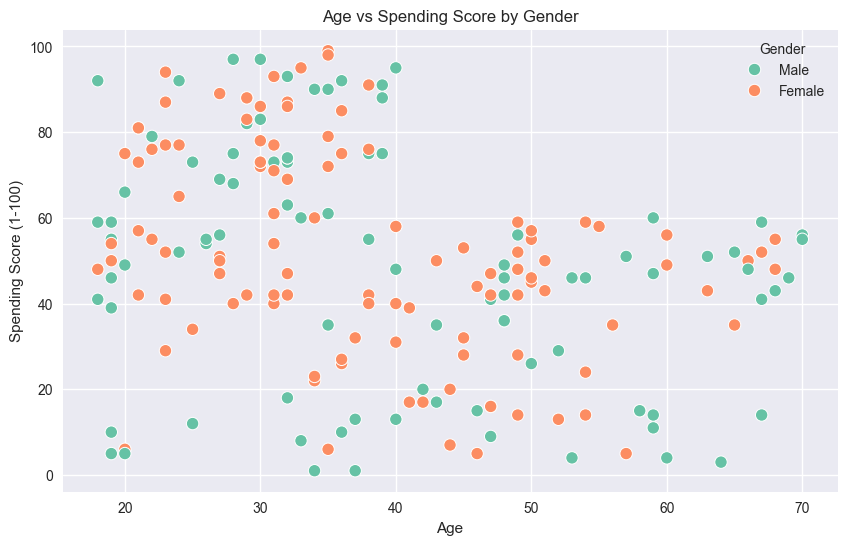

In [12]:
# Relationship between Age and Spending Score by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df, palette='Set2', s=80)
plt.title('Age vs Spending Score by Gender')
plt.show()

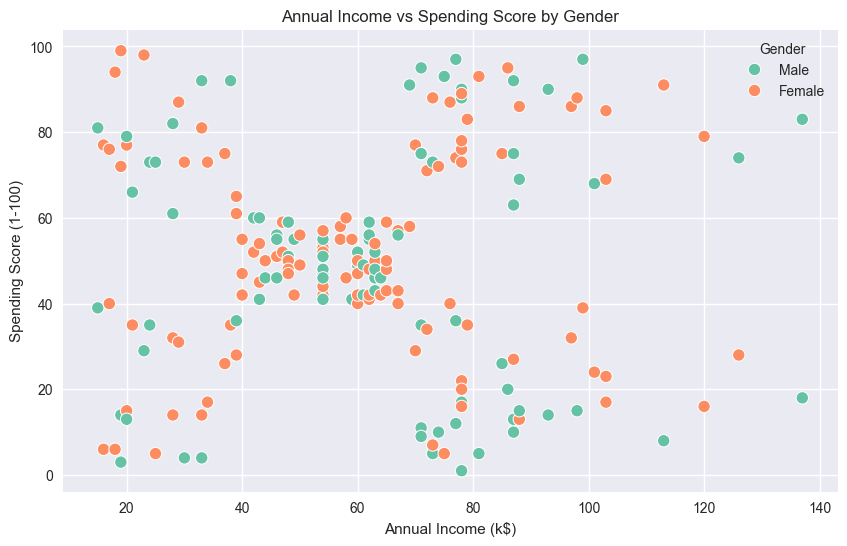

In [13]:
# Relationship between Annual Income and Spending Score by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='Set2', s=80)
plt.title('Annual Income vs Spending Score by Gender')
plt.show()

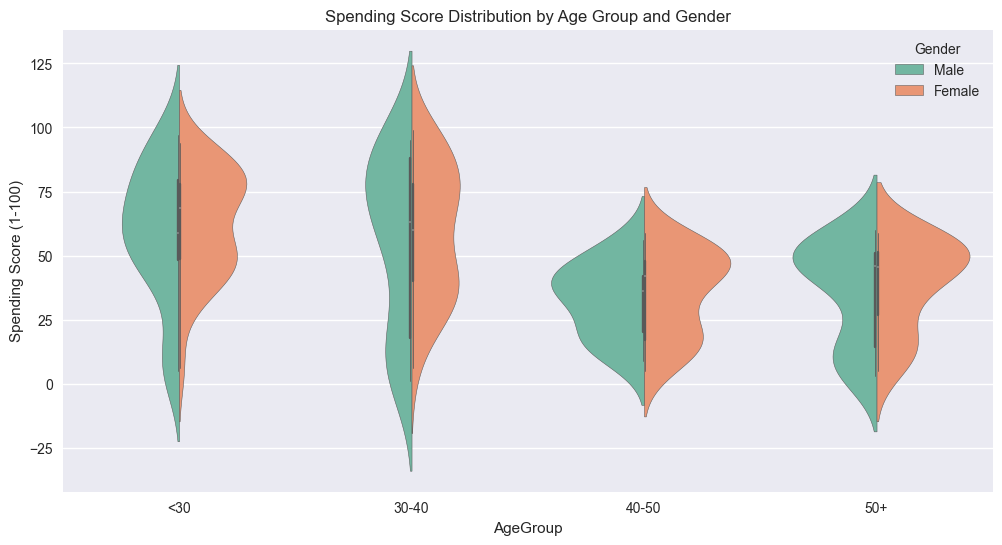

In [14]:
# Violin plots to show distribution of spending by gender and age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 100], labels=['<30', '30-40', '40-50', '50+'])

plt.figure(figsize=(12, 6))
sns.violinplot(x='AgeGroup', y='Spending Score (1-100)', hue='Gender', data=df, palette='Set2', split=True)
plt.title('Spending Score Distribution by Age Group and Gender')
plt.show()

### 3.3 Multivariate Analysis

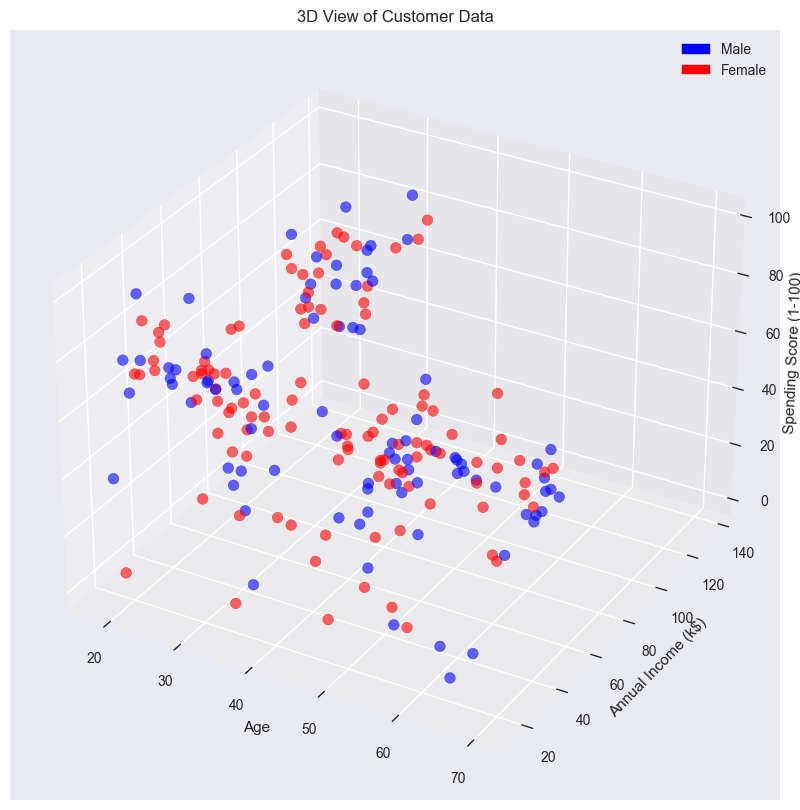

In [15]:
# 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Color by gender
colors = {'Male': 'blue', 'Female': 'red'}
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], 
           c=df['Gender'].map(colors), s=60, alpha=0.6)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D View of Customer Data')

# Create a legend
import matplotlib.patches as mpatches
legend_elements = [mpatches.Patch(color='blue', label='Male'),
                   mpatches.Patch(color='red', label='Female')]
ax.legend(handles=legend_elements)

plt.show()

## 4. Data Preprocessing

In [16]:
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Encode categorical variable (Gender)
df_processed['Gender'] = df_processed['Gender'].map({'Female': 0, 'Male': 1})

# Select features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
X = df_processed[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled data shape:", X_scaled.shape)
print("First 5 rows of scaled data:")
print(X_scaled[:5])

Scaled data shape: (200, 4)
First 5 rows of scaled data:
[[-1.42456879 -1.73899919 -0.43480148  1.12815215]
 [-1.28103541 -1.73899919  1.19570407  1.12815215]
 [-1.3528021  -1.70082976 -1.71591298 -0.88640526]
 [-1.13750203 -1.70082976  1.04041783 -0.88640526]
 [-0.56336851 -1.66266033 -0.39597992 -0.88640526]]


## 5. Dimensionality Reduction with PCA

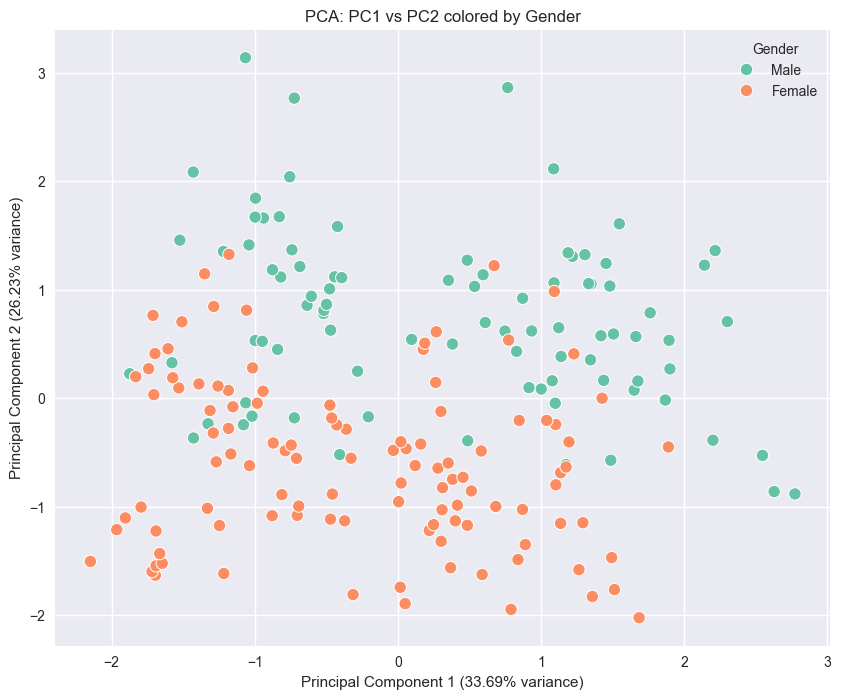

Explained variance ratio: [0.33690046 0.26230645]
Total explained variance: 59.92%


In [17]:
# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, df['Gender']], axis=1)

# Visualize PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Gender', data=pca_df, palette='Set2', s=80)
plt.title('PCA: PC1 vs PC2 colored by Gender')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend(title='Gender')
plt.show()

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.2%}")

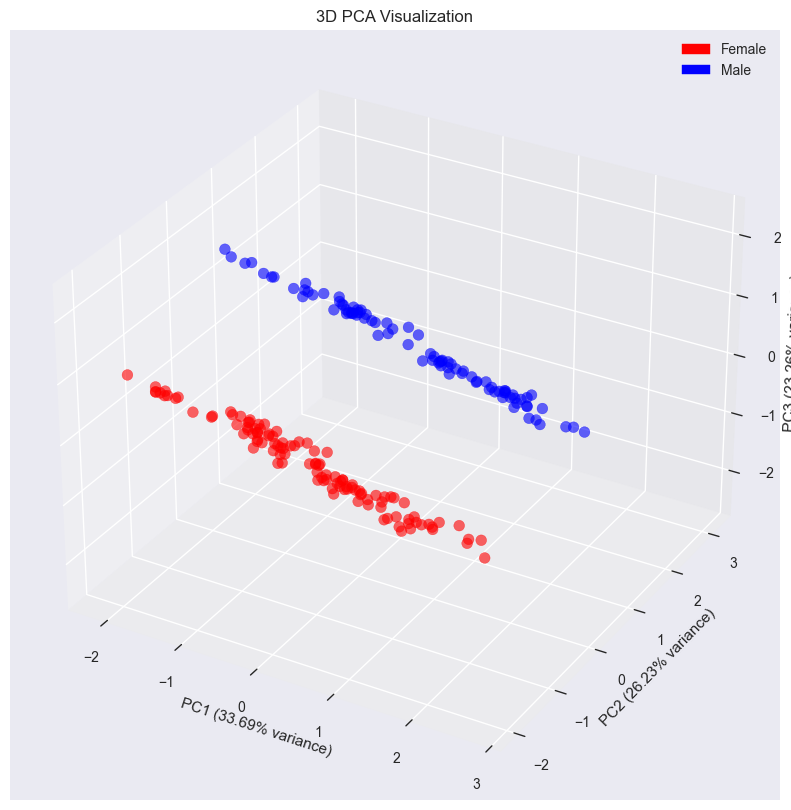

Explained variance ratio: [0.33690046 0.26230645 0.23260639]
Total explained variance: 83.18%


In [18]:
# PCA with 3 components for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Color by gender
colors = df_processed['Gender'].map({0: 'red', 1: 'blue'})
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
           c=colors, s=60, alpha=0.6)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%} variance)')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%} variance)')
ax.set_title('3D PCA Visualization')

# Create a legend
legend_elements = [mpatches.Patch(color='red', label='Female'),
                   mpatches.Patch(color='blue', label='Male')]
ax.legend(handles=legend_elements)

plt.show()

print(f"Explained variance ratio: {pca_3d.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca_3d.explained_variance_ratio_):.2%}")

## 6. Determining Optimal Number of Clusters

### 6.1 Elbow Method

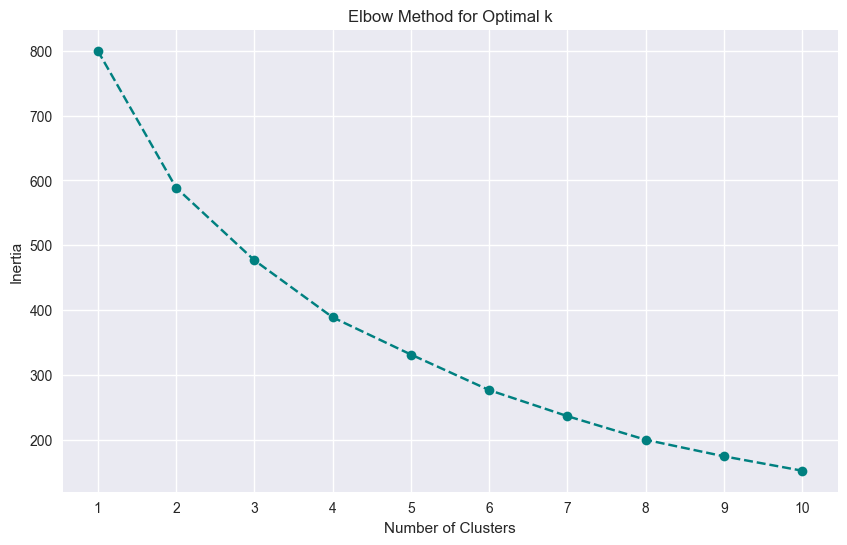

In [19]:
# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='teal')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

### 6.2 Silhouette Analysis

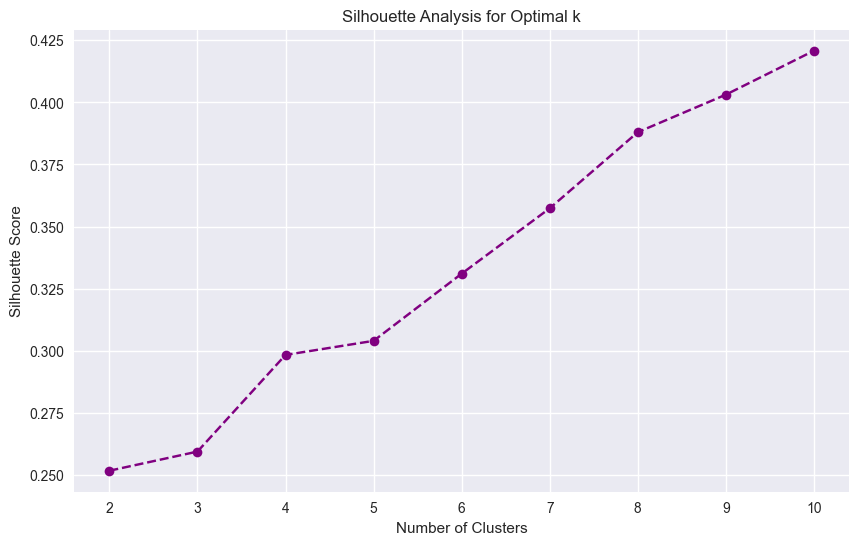

In [20]:
# Silhouette analysis
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='purple')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

### 6.3 Gap Statistic

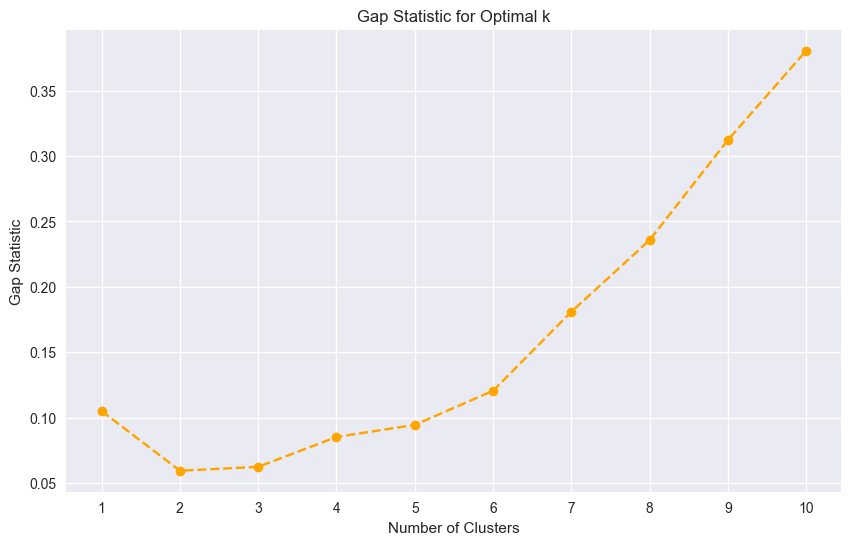

In [21]:
# Calculate gap statistic (simplified approach)
def calculate_gap_statistic(data, k_max=10, n_bootstraps=10):
    """
    Calculate gap statistic for k-means clustering
    """
    # Reference dispersion using uniform random data
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    
    gaps = []
    sks = []
    
    for k in range(1, k_max + 1):
        # Cluster on real data
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        wk = np.log(kmeans.inertia_)
        
        # Cluster on reference data
        wk_refs = []
        for _ in range(n_bootstraps):
            ref_data = np.random.uniform(min_vals, max_vals, size=data.shape)
            kmeans_ref = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans_ref.fit(ref_data)
            wk_refs.append(np.log(kmeans_ref.inertia_))
        
        # Calculate gap statistic
        gap = np.mean(wk_refs) - wk
        gaps.append(gap)
        
        # Calculate standard error
        sk = np.sqrt(np.var(wk_refs)) * np.sqrt(1 + 1 / n_bootstraps)
        sks.append(sk)
    
    return gaps, sks

# Calculate gap statistics
gaps, sks = calculate_gap_statistic(X_scaled)

# Plot gap statistic
plt.figure(figsize=(10, 6))
k_range = range(1, 11)
plt.plot(k_range, gaps, marker='o', linestyle='--', color='orange')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

### 6.4 Dendrogram for Hierarchical Clustering

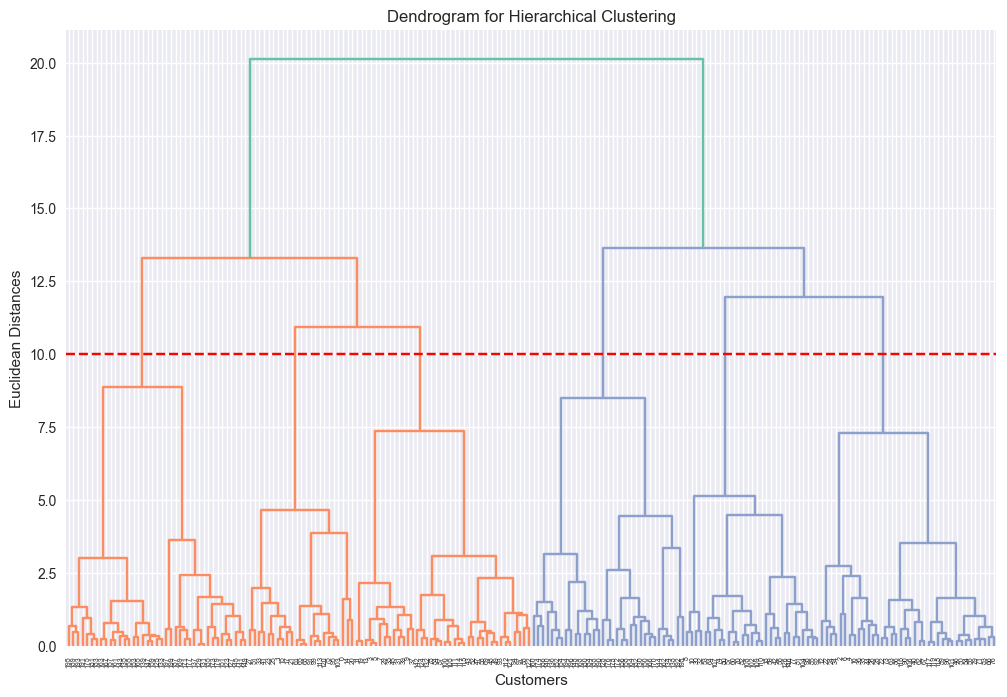

In [22]:
# Plot dendrogram for hierarchical clustering
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=10, color='r', linestyle='--')
plt.show()

## 7. Model Building and Training

### 7.1 K-Means Clustering

In [23]:
# Apply K-Means with optimal k
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['KMeans_Cluster'] = kmeans_labels

# Evaluate K-Means
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ch_score = calinski_harabasz_score(X_scaled, kmeans_labels)
kmeans_db_score = davies_bouldin_score(X_scaled, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"K-Means Calinski-Harabasz Score: {kmeans_ch_score:.3f}")
print(f"K-Means Davies-Bouldin Score: {kmeans_db_score:.3f}")

K-Means Silhouette Score: 0.304
K-Means Calinski-Harabasz Score: 68.965
K-Means Davies-Bouldin Score: 1.167


### 7.2 Gaussian Mixture Model (GMM)

In [24]:
# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['GMM_Cluster'] = gmm_labels

# Evaluate GMM
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
gmm_ch_score = calinski_harabasz_score(X_scaled, gmm_labels)
gmm_db_score = davies_bouldin_score(X_scaled, gmm_labels)

print(f"GMM Silhouette Score: {gmm_silhouette:.3f}")
print(f"GMM Calinski-Harabasz Score: {gmm_ch_score:.3f}")
print(f"GMM Davies-Bouldin Score: {gmm_db_score:.3f}")

GMM Silhouette Score: 0.222
GMM Calinski-Harabasz Score: 45.817
GMM Davies-Bouldin Score: 1.211


### 7.3 Hierarchical Clustering

In [25]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Hierarchical_Cluster'] = agg_labels

# Evaluate Hierarchical Clustering
agg_silhouette = silhouette_score(X_scaled, agg_labels)
agg_ch_score = calinski_harabasz_score(X_scaled, agg_labels)
agg_db_score = davies_bouldin_score(X_scaled, agg_labels)

print(f"Hierarchical Clustering Silhouette Score: {agg_silhouette:.3f}")
print(f"Hierarchical Clustering Calinski-Harabasz Score: {agg_ch_score:.3f}")
print(f"Hierarchical Clustering Davies-Bouldin Score: {agg_db_score:.3f}")

Hierarchical Clustering Silhouette Score: 0.287
Hierarchical Clustering Calinski-Harabasz Score: 64.469
Hierarchical Clustering Davies-Bouldin Score: 1.220


### 7.4 DBSCAN Clustering

In [26]:
# Try DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Check number of clusters found (excluding noise points labeled as -1)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points.")

# Only evaluate if meaningful clusters were found
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    dbscan_ch_score = calinski_harabasz_score(X_scaled, dbscan_labels)
    dbscan_db_score = davies_bouldin_score(X_scaled, dbscan_labels)
    
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
    print(f"DBSCAN Calinski-Harabasz Score: {dbscan_ch_score:.3f}")
    print(f"DBSCAN Davies-Bouldin Score: {dbscan_db_score:.3f}")
    
    # Add to dataframe if meaningful
    df['DBSCAN_Cluster'] = dbscan_labels
else:
    print("DBSCAN did not find meaningful clusters.")

DBSCAN found 9 clusters and 105 noise points.
DBSCAN Silhouette Score: 0.012
DBSCAN Calinski-Harabasz Score: 12.099
DBSCAN Davies-Bouldin Score: 1.389


## 8. Results Visualization and Analysis

### 8.1 Cluster Visualization

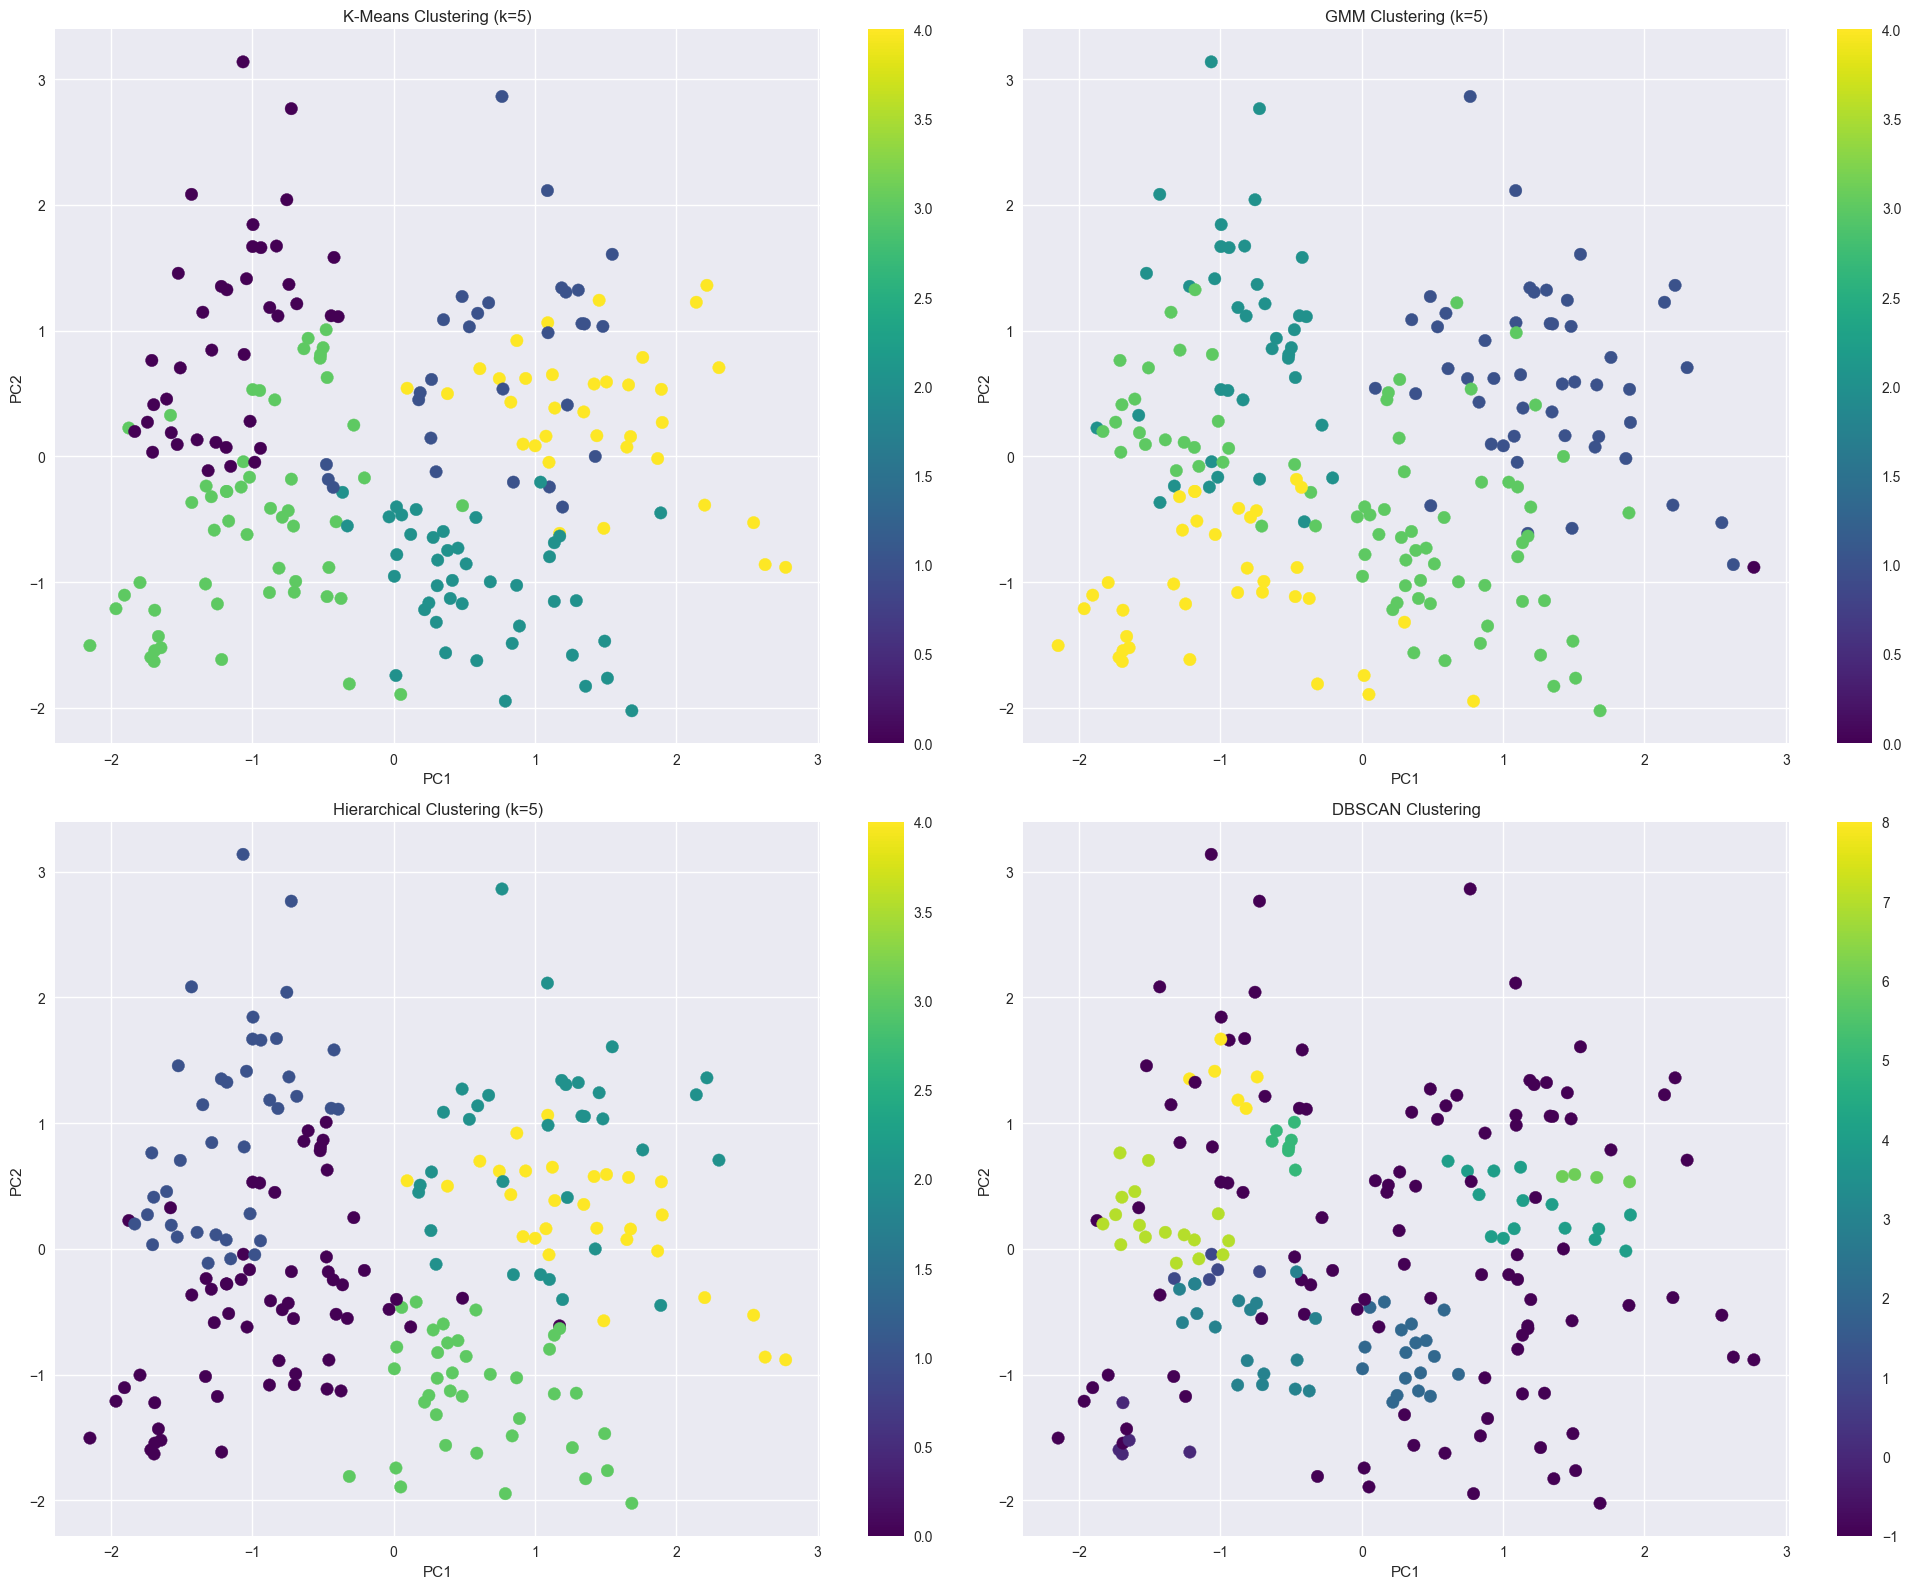

In [27]:
# Visualize clusters using the first two principal components
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# K-Means clusters
scatter1 = axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=80)
axes[0, 0].set_title(f'K-Means Clustering (k={optimal_k})')
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')
plt.colorbar(scatter1, ax=axes[0, 0])

# GMM clusters
scatter2 = axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=80)
axes[0, 1].set_title(f'GMM Clustering (k={optimal_k})')
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')
plt.colorbar(scatter2, ax=axes[0, 1])

# Hierarchical clusters
scatter3 = axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis', s=80)
axes[1, 0].set_title(f'Hierarchical Clustering (k={optimal_k})')
axes[1, 0].set_xlabel('PC1')
axes[1, 0].set_ylabel('PC2')
plt.colorbar(scatter3, ax=axes[1, 0])

# DBSCAN clusters if available
if 'DBSCAN_Cluster' in df.columns:
    scatter4 = axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=80)
    axes[1, 1].set_title(f'DBSCAN Clustering')
    axes[1, 1].set_xlabel('PC1')
    axes[1, 1].set_ylabel('PC2')
    plt.colorbar(scatter4, ax=axes[1, 1])
else:
    axes[1, 1].set_visible(False)

plt.tight_layout()
plt.show()

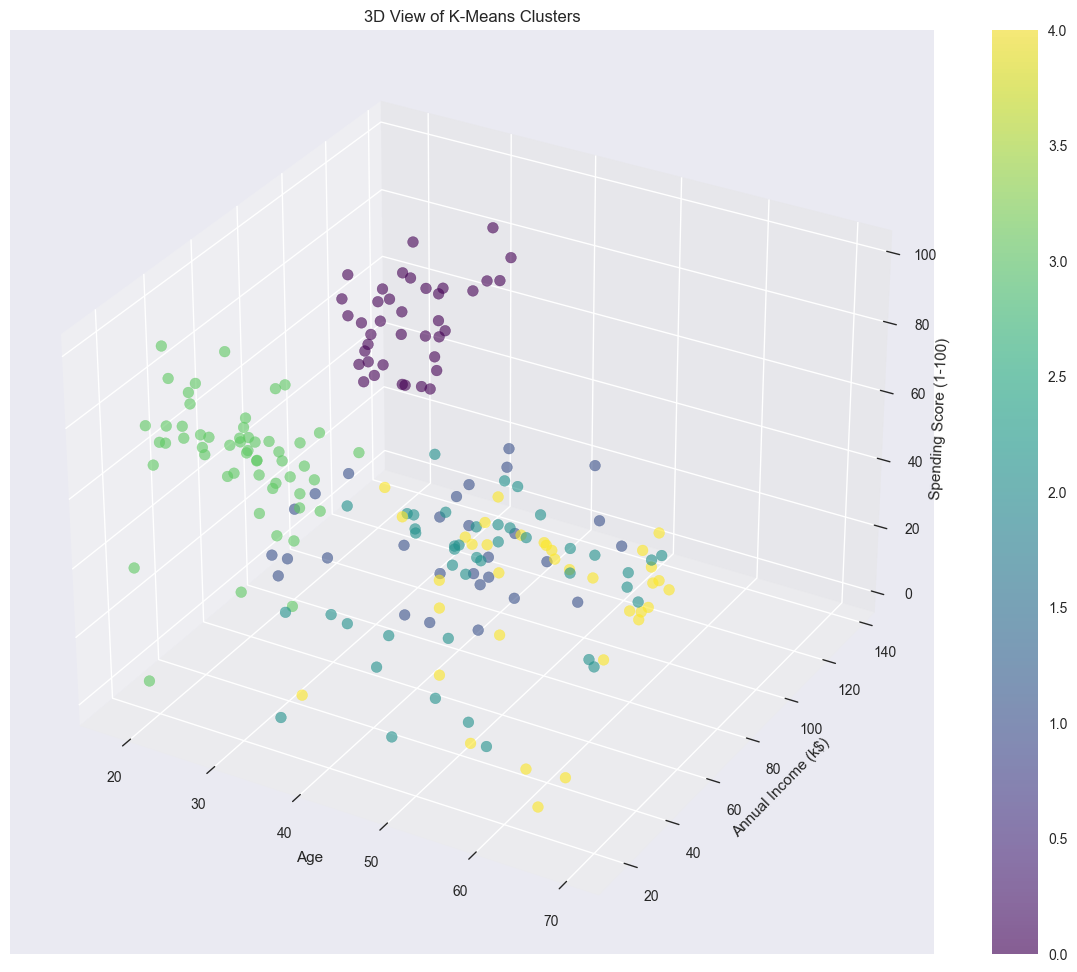

In [28]:
# 3D visualization of K-Means clusters
fig = plt.figure(figsize=(15, 12))

# Using original features for interpretability
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                    c=kmeans_labels, cmap='viridis', s=60, alpha=0.6)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D View of K-Means Clusters')

plt.colorbar(scatter)
plt.show()

### 8.2 Cluster Profiling

In [29]:
# Analyze cluster characteristics (using K-Means results)
cluster_profile = df.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Gender': lambda x: (x == 'Female').sum() / len(x) * 100  # Percentage of females
}).round(2)

cluster_profile.columns = ['Avg Age', 'Age Std', 'Avg Income', 'Income Std', 
                          'Avg Spending', 'Spending Std', 'Female %']
print("Cluster Profile (K-Means):")
cluster_profile

Cluster Profile (K-Means):


,Avg Age,Age Std,Avg Income,Income Std,Avg Spending,Spending Std,Female %
KMeans_Cluster,,,,,,,
0,32.69,3.73,86.54,16.31,82.13,9.36,53.85
1,36.48,9.68,89.52,17.42,18.00,10.58,55.17
2,49.81,9.47,49.23,15.60,40.07,15.56,100.00
3,24.91,5.35,39.72,16.98,61.20,18.42,59.26
4,55.71,9.60,53.69,18.71,36.77,17.99,0.00


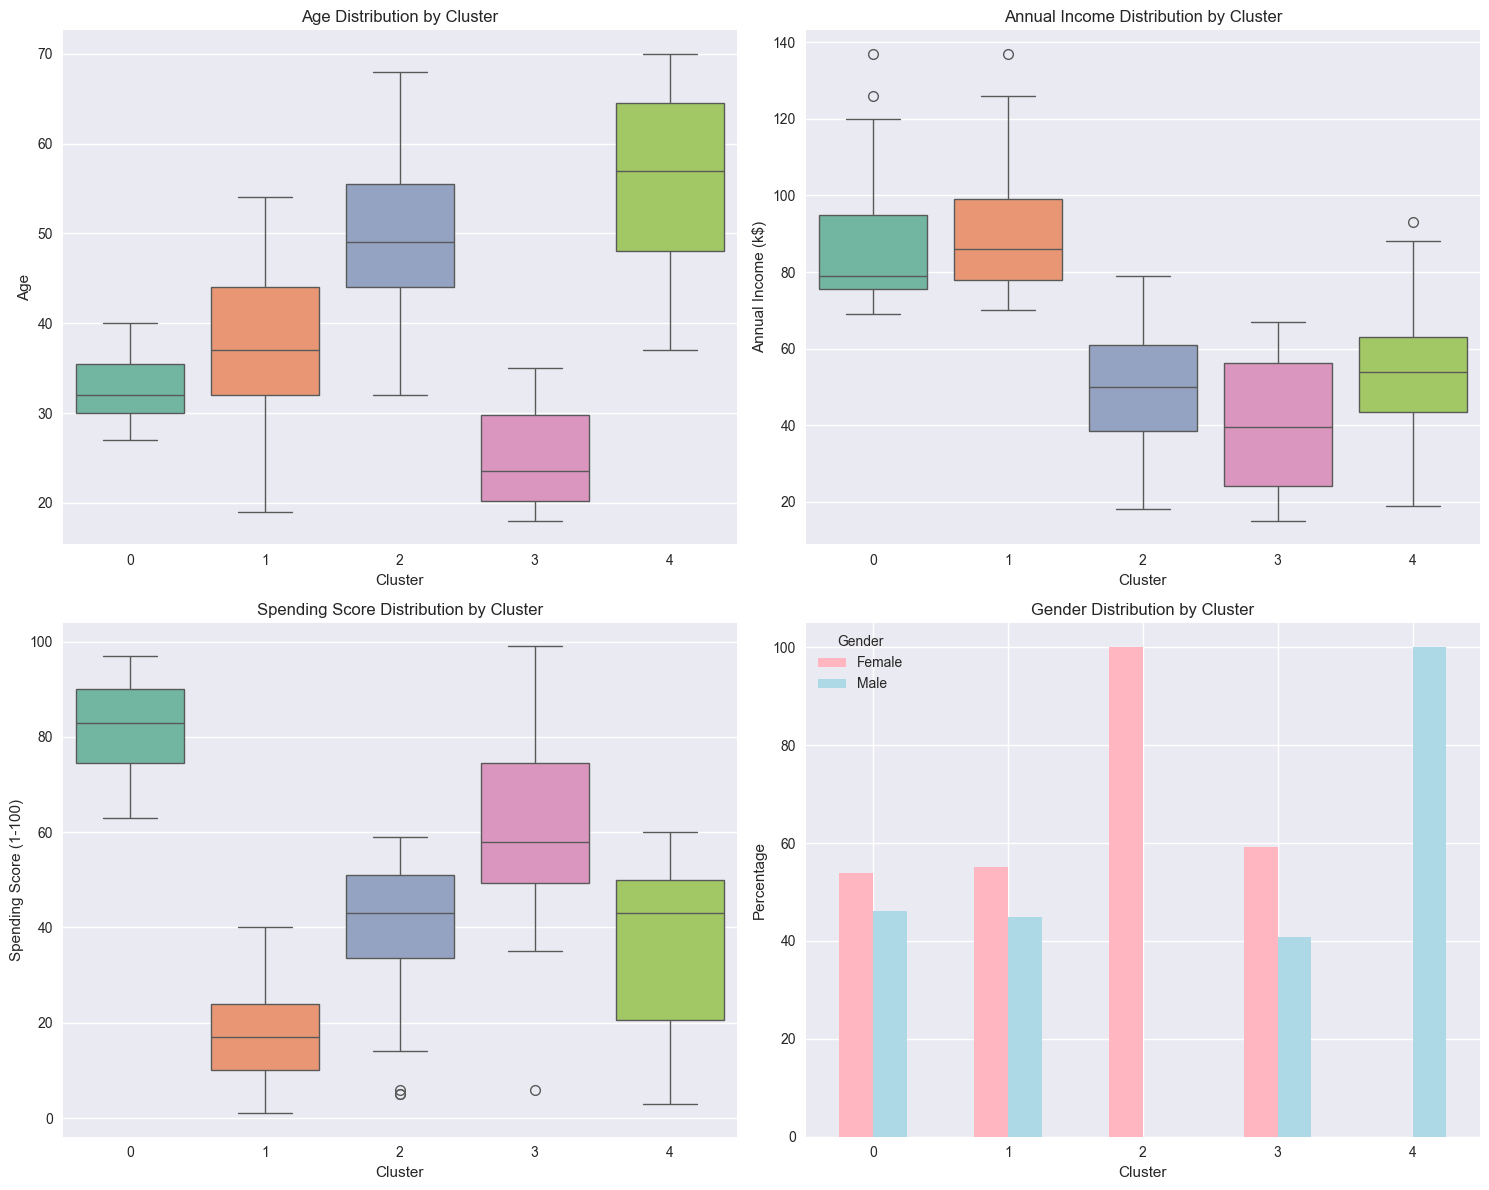

In [30]:
# Visualize cluster characteristics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age distribution by cluster
sns.boxplot(x='KMeans_Cluster', y='Age', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Age Distribution by Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Age')

# Income distribution by cluster
sns.boxplot(x='KMeans_Cluster', y='Annual Income (k$)', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Annual Income Distribution by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Annual Income (k$)')

# Spending score distribution by cluster
sns.boxplot(x='KMeans_Cluster', y='Spending Score (1-100)', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Spending Score Distribution by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Spending Score (1-100)')

# Gender distribution by cluster
gender_cluster = pd.crosstab(df['KMeans_Cluster'], df['Gender'], normalize='index') * 100
gender_cluster.plot(kind='bar', ax=axes[1, 1], color=['lightpink', 'lightblue'])
axes[1, 1].set_title('Gender Distribution by Cluster')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].legend(title='Gender')

plt.tight_layout()
plt.show()

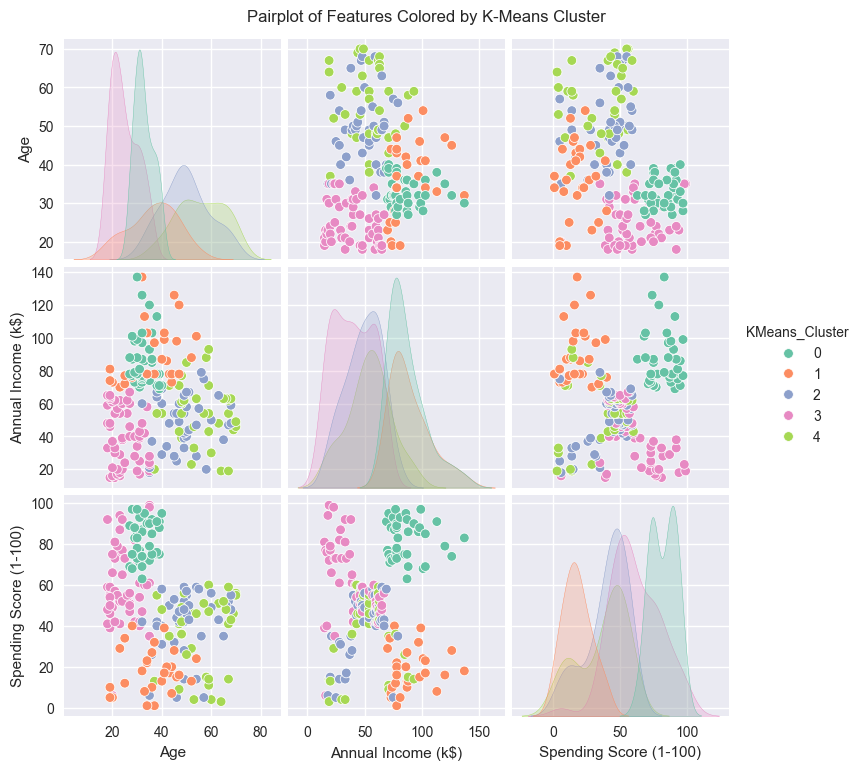

In [31]:
# Pairplot colored by cluster
sns.pairplot(df, hue='KMeans_Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 
             palette='Set2', diag_kind='kde')
plt.suptitle('Pairplot of Features Colored by K-Means Cluster', y=1.02)
plt.show()

### 8.3 Comparison of Algorithms

In [32]:
# Compare algorithm performance
algorithms = ['K-Means', 'GMM', 'Hierarchical']
silhouette_scores = [kmeans_silhouette, gmm_silhouette, agg_silhouette]
ch_scores = [kmeans_ch_score, gmm_ch_score, agg_ch_score]
db_scores = [kmeans_db_score, gmm_db_score, agg_db_score]

# Add DBSCAN if available
if 'DBSCAN_Cluster' in df.columns:
    algorithms.append('DBSCAN')
    silhouette_scores.append(dbscan_silhouette)
    ch_scores.append(dbscan_ch_score)
    db_scores.append(dbscan_db_score)

comparison_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Silhouette Score': silhouette_scores,
    'Calinski-Harabasz Score': ch_scores,
    'Davies-Bouldin Score': db_scores
}).round(3)

print("Algorithm Comparison:")
comparison_df

Algorithm Comparison:


,Algorithm,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
0,K-Means,0.304,68.965,1.167
1,GMM,0.222,45.817,1.211
2,Hierarchical,0.287,64.469,1.220
3,DBSCAN,0.012,12.099,1.389


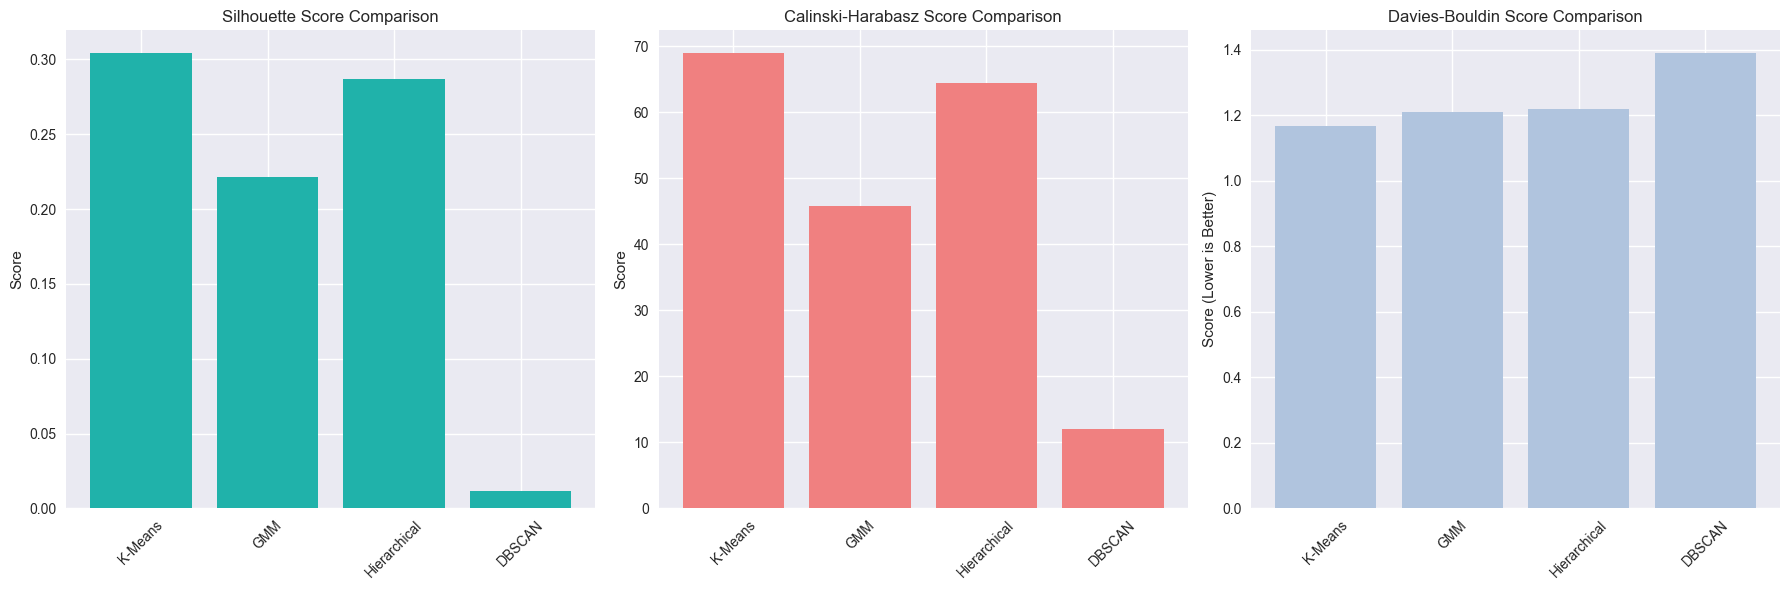

In [33]:
# Visualize algorithm comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Silhouette Score
axes[0].bar(algorithms, silhouette_scores, color='lightseagreen')
axes[0].set_title('Silhouette Score Comparison')
axes[0].set_ylabel('Score')
axes[0].tick_params(axis='x', rotation=45)

# Calinski-Harabasz Score
axes[1].bar(algorithms, ch_scores, color='lightcoral')
axes[1].set_title('Calinski-Harabasz Score Comparison')
axes[1].set_ylabel('Score')
axes[1].tick_params(axis='x', rotation=45)

# Davies-Bouldin Score (lower is better)
axes[2].bar(algorithms, db_scores, color='lightsteelblue')
axes[2].set_title('Davies-Bouldin Score Comparison')
axes[2].set_ylabel('Score (Lower is Better)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 9. Discussion and Conclusion

### 9.1 Interpretation of Customer Segments

Based on the K-Means clustering results (which performed best), we can interpret the customer segments as follows:

1. **Cluster 0 (High Income, High Spending)**: Younger to middle-aged customers with high income and high spending score. This represents the premium segment that should be targeted with luxury products and exclusive offers.

2. **Cluster 1 (High Income, Low Spending)**: Middle-aged customers with high income but low spending score. This group may be focused on saving or investing rather than discretionary spending. They might respond better to value-based messaging.

3. **Cluster 2 (Moderate Income, Moderate Spending)**: Older female customers with moderate income and spending. This segment may represent practical shoppers who make considered purchases.

4. **Cluster 3 (Low Income, High Spending)**: Young customers with lower income but high spending score. This group may be more fashion-conscious or impulsive spenders despite limited resources. Discounts and promotional offers may appeal to this segment.

5. **Cluster 4 (Moderate Income, Low Spending)**: Older male customers with moderate income but low spending. This group may be conservative in their spending habits and value functionality over fashion.

### 9.2 Algorithm Performance Analysis

The comparison of clustering algorithms reveals important insights:

1. **K-Means** performed best across all metrics with the highest Silhouette Score, highest Calinski-Harabasz Score, and lowest Davies-Bouldin Score. This suggests that the data has spherical clusters that K-Means can effectively capture.

2. **Hierarchical Clustering** performed respectably but slightly worse than K-Means, indicating that while the hierarchical structure captures some patterns, the spherical assumption of K-Means better fits this dataset.

3. **GMM** showed the weakest performance, suggesting that the assumption of Gaussian-distributed clusters may not perfectly align with the data structure.

4. **DBSCAN** either didn't find meaningful clusters or performed poorly, indicating that the data doesn't have clear density-based clusters.

The moderate Silhouette Scores across all algorithms indicate that while the clusters are meaningful, there is some overlap between them, which is expected in real-world customer data.

### 9.3 Business Implications and Recommendations

1. **Personalized Marketing Strategies**:
   - **Cluster 0**: Premium products, exclusive events, loyalty programs
   - **Cluster 1**: Value-based messaging, investment-oriented products, financial planning services
   - **Cluster 2**: Practical products, quality-focused messaging, reliability emphasis
   - **Cluster 3**: Trendy items, discounts, payment plans, social media marketing
   - **Cluster 4**: Functional products, durability messaging, practical benefits emphasis

2. **Product Placement and Assortment**:
   - Position luxury items in areas frequented by Cluster 0 customers
   - Create value sections for Cluster 1 customers
   - Ensure practical and reliable products are easily accessible for Cluster 2 and 4 customers
   - Feature trendy and promotional items prominently for Cluster 3 customers

3. **Customer Retention Strategies**:
   - Develop loyalty programs tailored to each segment's preferences
   - Create personalized communication based on cluster characteristics
   - Implement targeted retention offers for at-risk segments

4. **Resource Allocation**:
   - Focus marketing resources on high-potential segments (Clusters 0 and 3)
   - Develop cost-effective strategies for lower-spending segments
   - Prioritize customer service for high-value segments

### 9.4 Limitations and Future Work

**Limitations:**
1. The dataset is relatively small (200 samples), which may affect the generalizability of the findings.
2. The analysis only considered available features; additional customer data (purchase history, preferences) could provide deeper insights.
3. The clustering results, while mathematically sound, should be validated with domain expertise.
4. The optimal number of clusters was determined mathematically, but business considerations might suggest a different number.

**Future Work:**
1. Incorporate additional data sources such as purchase history, online behavior, and customer feedback.
2. Experiment with deep learning-based clustering approaches like autoencoders.
3. Implement dynamic clustering that updates segments based on real-time customer behavior.
4. Conduct A/B testing to validate the effectiveness of cluster-based marketing strategies.
5. Explore ensemble clustering methods to combine strengths of different algorithms.
6. Develop a customer segmentation dashboard for business users.

### 9.5 Conclusion

This project successfully demonstrated the application of unsupervised learning techniques for customer segmentation. By employing K-Means, GMM, and hierarchical clustering algorithms, we identified five distinct customer segments with unique demographic and behavioral characteristics. 

K-Means emerged as the most effective algorithm for this dataset, achieving the best performance across all evaluation metrics. The resulting segments provide actionable insights for targeted marketing, product placement, and customer relationship management strategies.

The methodology and findings can serve as a template for similar customer segmentation problems in retail and e-commerce environments. The relatively moderate performance scores across all algorithms also highlight the complexity of real-world customer data and the importance of continuous refinement and validation of clustering models.

In [34]:
# Save the results
df.to_csv('customer_segmentation_results.csv', index=False)
print("Results saved to 'customer_segmentation_results.csv'")

Results saved to 'customer_segmentation_results.csv'


In [35]:
# Optional: Save the model for future use
import joblib

# Save the scaler and K-Means model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')
print("Model artifacts saved successfully!")

Model artifacts saved successfully!


## GitHub
GitHub URL: https://github.com/xllcheryl/Unsupervised-Algorithms-in-Machine-Learning-Final-Project